In [1]:
# fraud detection    how to handle imbalanced datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import KFold,StratifiedKFold, train_test_split

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from sklearn.metrics import roc_curve,roc_auc_score,precision_score,recall_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_dataframe = pd.read_csv("creditcard.csv")
display(raw_dataframe.head())
display(raw_dataframe.info())
display(raw_dataframe.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
# mean of amount 
raw_dataframe.Amount.mean()

88.34961925093133

In [4]:
# check null values (NaN or None) 
# raw_dataframe.isnull().sum().max()  == 0  indicates no null
raw_dataframe.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [5]:
# count fraud count   
display(raw_dataframe.Class.unique()) # show values  [0,1]
display(raw_dataframe.Class.mean()) # 0.001727 

array([0, 1])

0.001727485630620034

Not fraudulent 99.83%
Fraudulent 0.17%


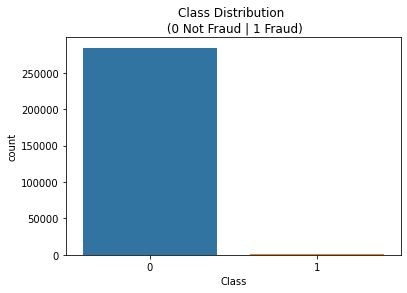

In [6]:
sns.countplot('Class', data=raw_dataframe)
plt.title('Class Distribution \n (0 Not Fraud | 1 Fraud)')
print(f'Not fraudulent {100-round(raw_dataframe.Class.mean()*100,2)}%')
print(f'Fraudulent {round(raw_dataframe.Class.mean()*100,2)}%' )

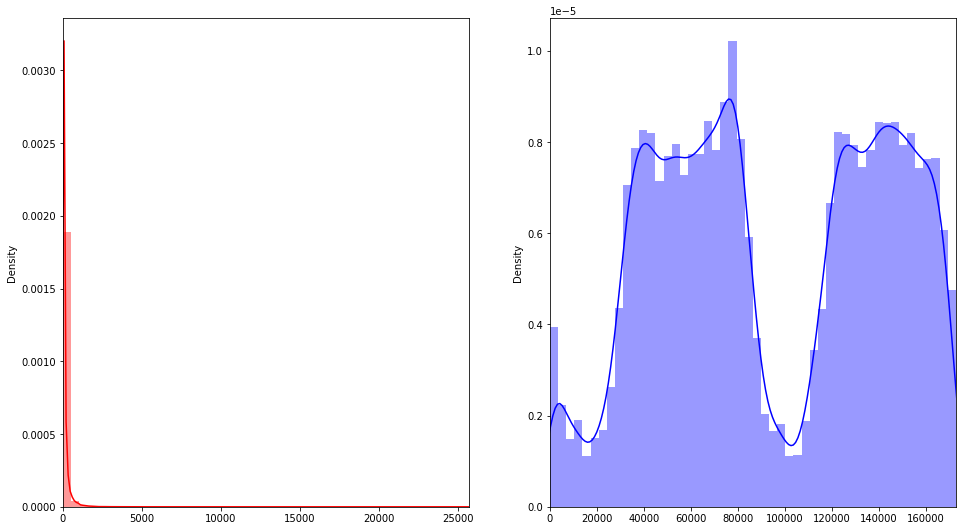

In [8]:
fig, ax = plt.subplots(1,2,figsize=(16,9))
amount_val = raw_dataframe['Amount'].values
time_val = raw_dataframe['Time'].values
sns.distplot(amount_val,ax=ax[0],color='r')
ax[0].set_xlim([min(amount_val), max(amount_val)])
sns.distplot(time_val,ax=ax[1],color='b')
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

In [7]:
raw_dataframe.shape

(284807, 31)

In [8]:
# under sampling
# create a sub sample that has 50/50 ratio of "Fraud" and "No-Fraud"
df = raw_dataframe

train_df,test_df = train_test_split(df,test_size=0.2,shuffle=True)

std_scaler = StandardScaler()

train_df['scaled_amount'] = std_scaler.fit_transform(train_df['Amount'].values.reshape(-1,1))
train_df['scaled_time'] = std_scaler.fit_transform(train_df['Time'].values.reshape(-1,1))

train_df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = train_df['scaled_amount']
scaled_time = train_df['scaled_time']

train_df.drop(['scaled_amount','scaled_time'],axis=1,inplace=True)
train_df.insert(0,'scaled_amount',scaled_amount)
train_df.insert(1,'scaled_time',scaled_time)

train_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
250914,-0.206644,1.268804,-0.218079,0.516713,1.195388,-0.031158,-0.059693,0.388592,0.204578,0.053888,...,0.056993,0.335036,1.177159,-0.076122,0.701904,-0.679756,0.689228,0.082678,0.184073,0
80332,-0.349630,-0.766650,-0.694515,1.111294,0.883718,0.889120,1.906225,1.636175,0.878379,0.222965,...,-0.010981,-0.049828,0.359759,-0.470138,-1.548041,0.246397,-0.059298,-0.304432,-0.367700,0
224151,-0.346506,1.027701,-0.883400,1.546583,-0.116675,-0.809756,0.319188,-1.118352,0.964099,-0.160175,...,0.491071,-0.371209,-0.603203,0.119816,-0.024882,-0.282508,0.160193,0.664181,0.366666,0
118721,-0.316507,-0.414036,-0.801444,0.656209,0.919133,-1.667599,-1.148695,0.511927,-2.629432,-5.069244,...,1.238543,-2.649400,0.059994,0.105929,-0.094250,1.091939,-0.476680,-0.064936,0.185367,0
280613,-0.317589,1.574389,-0.059976,0.856285,-0.932174,-1.219424,1.190212,-1.240903,1.483815,-0.220567,...,-0.160030,0.249716,0.785812,-0.277310,-0.493893,-0.339754,0.104678,0.374843,0.250606,0


In [10]:
# scale the test set
test_df['scaled_amount'] = std_scaler.fit_transform(test_df['Amount'].values.reshape(-1,1))
test_df['scaled_time'] = std_scaler.fit_transform(test_df['Time'].values.reshape(-1,1))
test_df.drop(['Time','Amount'],axis=1,inplace=True)

scaled_amount = test_df['scaled_amount']
scaled_time = test_df['scaled_time']

test_df.drop(['scaled_amount','scaled_time'],axis=1,inplace=True)
test_df.insert(0,'scaled_amount',scaled_amount)
test_df.insert(1,'scaled_time',scaled_time)

test_df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
4673,-0.244547,-1.919839,-0.679682,2.000999,1.014791,2.813557,0.707276,0.164170,0.795520,0.113660,...,0.175388,-0.081765,-0.079110,-0.366655,-0.458669,0.605073,0.362769,-0.103685,0.003031,0
19053,-0.368261,-1.373157,-1.008001,1.389728,1.137132,-0.083683,-0.221512,-0.686793,0.188850,-0.661639,...,-0.034658,0.533454,-0.945091,0.134603,0.426151,-0.210915,0.044704,0.236854,0.161059,0
67957,-0.346407,-0.892224,1.391910,-0.500523,0.453927,-0.860227,-0.920561,-0.539507,-0.678313,-0.010861,...,0.067745,-0.069969,-0.365259,0.088132,-0.018074,0.235702,-0.477556,0.004641,0.008217,0
93195,-0.288255,-0.648961,-2.047835,2.301769,0.421649,1.361841,-0.336518,0.898484,-1.676191,-5.324898,...,1.380619,-2.408718,1.453433,0.302894,0.060764,-0.409537,-0.237274,-0.600730,-0.224934,0
136260,-0.288424,-0.283233,-0.525941,-0.510695,2.884854,-0.690415,-1.391947,0.503942,-0.853214,0.388836,...,-0.319940,-0.347171,-0.128530,0.001572,0.621361,-0.540310,0.968597,0.135463,0.133643,0


In [9]:
# show scaled data
amount_val_train = train_df['scaled_amount'].values
time_val_train = train_df['scaled_time'].values
amount_val_test = test_df['scaled_amount'].values
time_val_test = test_df['scaled_time'].values

fig, ax = plt.subplots(2,2,figsize=(16,9))

sns.distplot(amount_val_train,ax=ax[0,0],color='r')
ax[0,0].set_xlim([min(amount_val_train), max(amount_val_train)])

sns.distplot(time_val_train,ax=ax[0,1],color='b')
ax[0,1].set_xlim([min(time_val_train), max(time_val_train)])

sns.distplot(amount_val_test,ax=ax[1,0],color='g')
ax[1,0].set_xlim([min(amount_val_test), max(amount_val_test)])

sns.distplot(time_val_test,ax=ax[1,1],color='y')
ax[1,1].set_xlim([min(time_val_test), max(time_val_test)])

plt.show()

KeyError: 'scaled_amount'

In [9]:
# split the data set

"""
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df)*100,2))
print('Fraud', round(df['Class'].value_counts()[1]/len(df)*100,2))

X = df.drop('Class',axis=1)
y = df['Class']
display(X.head())
display(y.head())

skf = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

for train_index, test_index in skf.split(X,y):
    print('Train:', train_index, 'Test:', test_index)
    original_Xtrain,original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
    
# df to ndarray    
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain,return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('-'*100)

print('Label Distribution')
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))
"""

No Frauds 99.83
Fraud 0.17


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distribution
[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [10]:
# 492 fraud rows 
train_df =train_df.sample(frac=1)
fraud_train_df =train_df.loc[df['Class']==1]
non_fraud_train_df = train_df.loc[df['Class']==0][:492]

normal_distributed_train_df = pd.concat([fraud_train_df,non_fraud_train_df])

new_df =normal_distributed_train_df.sample(frac=1,random_state=5)

new_df.head()



,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
55899,-0.113322,-1.003669,-1.099289,0.038441,1.603226,-1.699414,-1.091635,-0.819770,-0.193260,0.514461,...,-0.476614,-0.373191,-1.098085,0.249049,0.476938,-0.518805,0.541389,-0.125085,0.000414,0
6719,-0.349630,-1.819691,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,...,0.632710,0.536892,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,1
247163,-0.313623,1.234238,2.024737,-0.172546,-2.964915,-0.571849,2.601458,3.145524,-0.406254,0.782314,...,-0.104402,-0.347480,-1.001164,0.356425,0.605238,-0.267501,0.218816,-0.040723,-0.041392,0
204277,-0.345705,0.849352,2.042175,-0.048217,-1.160228,0.217274,0.145694,-0.685844,0.132978,-0.215899,...,-0.147992,-0.248669,-0.575779,0.277873,-0.312646,-0.257074,0.195417,-0.069434,-0.071493,0
244004,-0.349630,1.206471,-4.673231,4.195976,-8.392423,7.743215,-1.138803,-2.094899,-3.839487,0.543053,...,-0.180279,0.554185,0.656076,0.482417,-0.624399,-0.296289,0.374802,-2.678544,0.412368,1


Distribution of the classes in the sub sample
0    0.547275
1    0.452725
Name: Class, dtype: float64


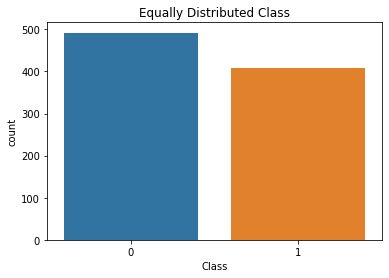

In [11]:
print('Distribution of the classes in the sub sample')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class',data=new_df)
plt.title('Equally Distributed Class')
plt.show()

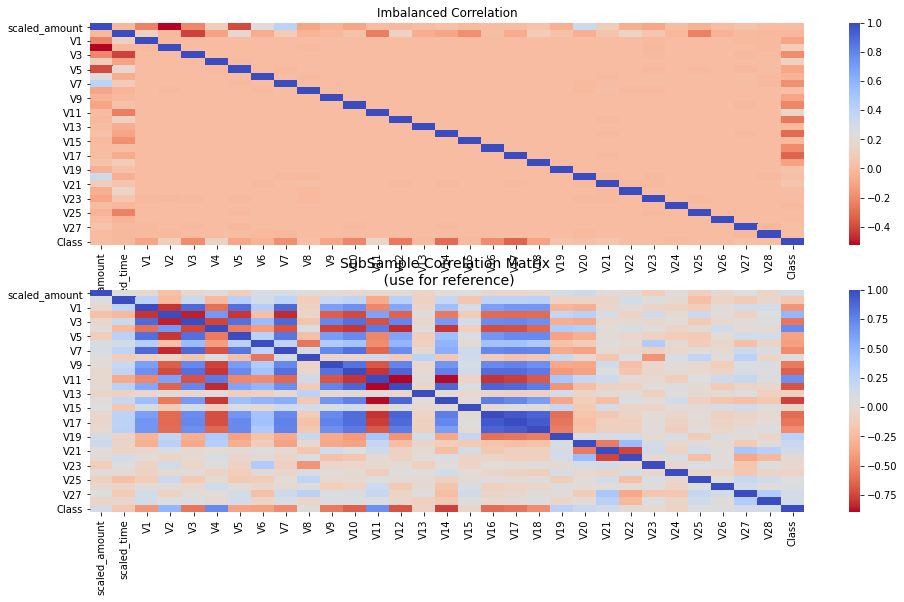

In [12]:
fig, ax = plt.subplots(2,1,figsize=(16,9))

corr = train_df.corr()
sns.heatmap(corr,cmap='coolwarm_r',annot_kws={'size':20},ax=ax[0])
ax[0].set_title('Imbalanced Correlation')

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax[1])
ax[1].set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

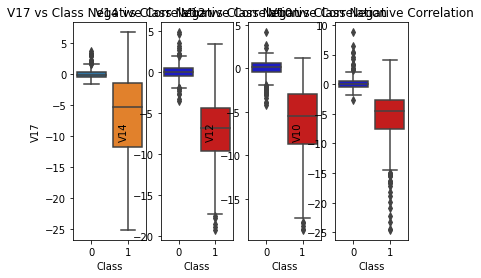

In [13]:
colors = ["#0101DF", "#DF0101"]
f,axes = plt.subplots(ncols=4)
sns.boxplot(x= 'Class', y = 'V17', data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

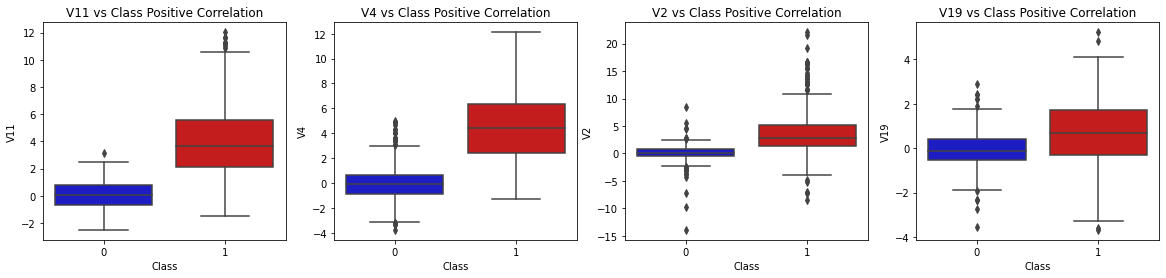

In [15]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

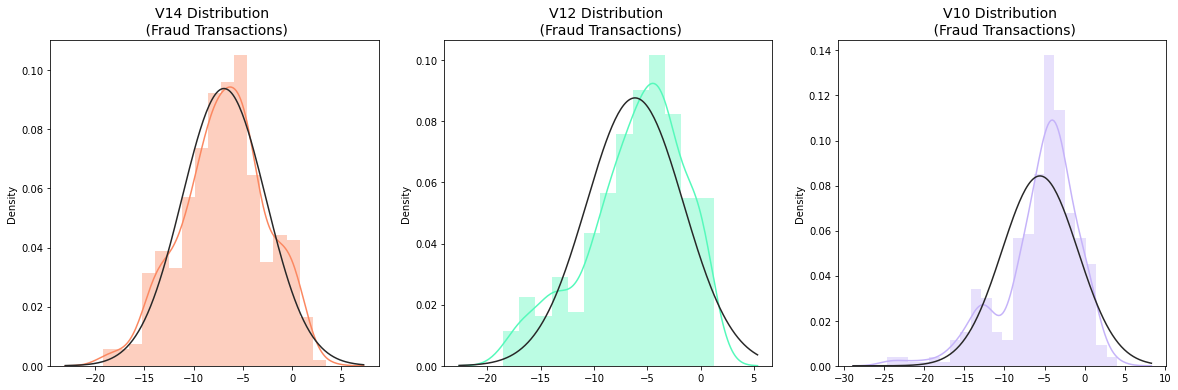

In [14]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [20]:
# remove outliers
v14_fraud = new_df['V14'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(v14_fraud,25), np.percentile(v14_fraud,75)
print('Quantile 25:{} | Quartile 75:{}'.format(q25,q75))
v14_iqr = q75-q25
print('iqr:{}'.format(v14_iqr))

v14_cut_off = v14_iqr*1.5
v14_lower ,v14_higher = q25-v14_cut_off,q75+v14_cut_off
print('Cut off:{}'.format(v14_cut_off))
print(f'V14 lower:{v14_lower}')
print(f'V14 higher:{v14_higher}')

outliers = [ x for x in v14_fraud if x <v14_lower or x >v14_higher]
print(f'Feature v14 outliers for fraud class:{len(outliers)}')


Quantile 25:-9.880753577348127 | Quartile 75:-4.473319384448947
iqr:5.40743419289918
Cut off:8.111151289348769
V14 lower:-17.991904866696895
V14 higher:3.637831904899821
Feature v14 outliers for fraud class:4


In [15]:
# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V12 Lower: -17.2746660104007
V12 Upper: 5.64272637071938
V12 outliers: [-18.047596570821604, -18.4311310279993, -17.7691434633638, -18.553697009645802, -17.631606313870698]
Feature V12 Outliers for Fraud Cases: 5
Number of Instances after outliers removal: 894
V10 Lower: -14.583836108565054
V10 Upper: 4.507127490235808
V10 outliers: [-24.403184969972802, -16.3035376590131, -17.141513641289198, -14.9246547735487, -15.1237521803455, -16.2556117491401, -15.2399619587112, -23.2282548357516, -18.2711681738888, -18.9132433348732, -16.6496281595399, -15.2399619587112, -15.563791338730098, -15.346098846877501, -24.5882624372475, -22.1870885620007, -20.949191554361104, -15.563791338730098, -19.836148851696, -16.6011969664137, -14.9246547735487]
Feature V10 Outliers for Fraud Cases: 21
Number of Instances after outliers removal: 868


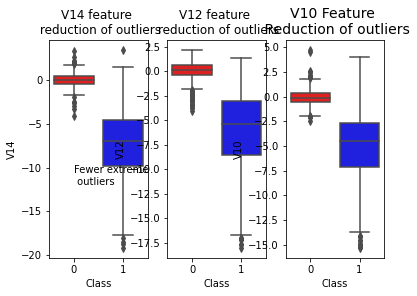

In [22]:
# plot
f, (ax1,ax2,ax3) =plt.subplots(1,3)
colors=['red', 'blue']

sns.boxplot(x='Class', y='V14',data=new_df,ax=ax1,palette=colors)
ax1.set_title('V14 feature \n reduction of outliers')
ax1.annotate('Fewer extreme \n outliers', xy = (1,-17.5),xytext=(0,-12))

sns.boxplot(x='Class',y = 'V12',data=new_df,ax=ax2,palette=colors)
ax2.set_title('V12 feature \n reduction of outliers' )

sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)

plt.show()

Text(0, 0.5, 'cumulative explained variance')

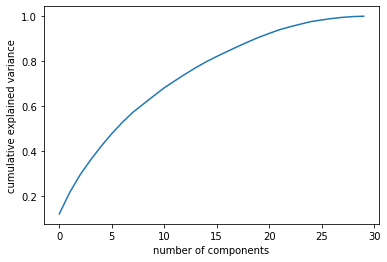

In [16]:
# PCA pick 95% vairance == 20
pca = PCA().fit(train_df.drop("Class",axis=1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [18]:
# dimension reduction and clustering
X = new_df.drop('Class',axis=1)
y = new_df['Class']

# PCA Implementation
t0 = time.time()
X_reduced_pca_train = PCA(n_components=20, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

"""
#T-SNE Implementation
t0 = time.time()
X_reduced_tsne_train = TSNE(n_components=2,random_state=15).fit_transform(X.values)
t1 = time.time()
print(f'T-SNE took {t1-t0} seconds')

# TruncatedSVD
t0 = time.time()
X_reduced_svd_train = TruncatedSVD(n_components=22, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))
"""

PCA took 0.031 s


'\n#T-SNE Implementation\nt0 = time.time()\nX_reduced_tsne_train = TSNE(n_components=2,random_state=15).fit_transform(X.values)\nt1 = time.time()\nprint(f\'T-SNE took {t1-t0} seconds\')\n\n# TruncatedSVD\nt0 = time.time()\nX_reduced_svd_train = TruncatedSVD(n_components=22, algorithm=\'randomized\', random_state=42).fit_transform(X.values)\nt1 = time.time()\nprint("Truncated SVD took {:.2} s".format(t1 - t0))\n'

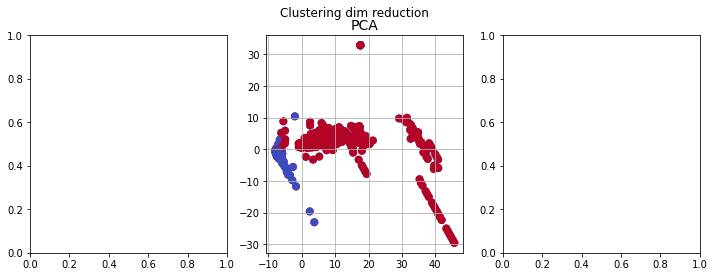

In [19]:
f ,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))
f.suptitle('Clustering dim reduction')

blue_patch = mpatches.Patch(color='blue',label='No Fraud')
red_patch = mpatches.Patch(color='red',label='Fraud')

# PCA scatter plot
ax2.scatter(X_reduced_pca_train[:,0], X_reduced_pca_train[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca_train[:,0], X_reduced_pca_train[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)

"""
# t SNE
ax1.scatter(X_reduced_tsne_train[:,0],X_reduced_tsne_train[:,1],c=(y==0),label='No Fraud')
ax1.scatter(X_reduced_tsne_train[:,0],X_reduced_tsne_train[:,1],c=(y==1),label='Fraud')
ax1.grid(True)
ax1.legend(handles=[blue_patch,red_patch])

# truncated SVD
ax3.scatter(X_reduced_svd_train[:,0], X_reduced_svd_train[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd_train[:,0], X_reduced_svd_train[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])
"""
plt.show()

In [20]:
# classifier
# grid search cv
# SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# ADD conv net
# xgboost
# naive bayesian

In [21]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

In [22]:
# 
X_train, y_train = X_reduced_pca_train, new_df['Class']
for k, classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    train_score = cross_val_score(classifier,X_train,y_train,cv=10,scoring='roc_auc')
    print(f'Classifiers: {classifier.__class__.__name__} roc_auc score:{train_score}')
    print(f'mean of the score: { np.mean(train_score)}')


Classifiers: LogisticRegression roc_auc score:[0.99033298 0.98711063 1.         0.98227712 0.99570354 0.96777658
 0.9377014  0.98504274 0.96929825 0.99232456]
mean of the score: 0.9807567797699376
Classifiers: KNeighborsClassifier roc_auc score:[0.94065521 0.97771214 0.99462943 0.9613319  0.95810956 0.96643394
 0.92320086 0.95005342 0.95038377 0.96929825]
mean of the score: 0.959180847608949
Classifiers: SVC roc_auc score:[0.98603652 0.9962406  0.99838883 0.97314715 0.99087003 0.98174006
 0.94629431 0.98290598 0.96765351 0.98958333]
mean of the score: 0.9812860333067102
Classifiers: DecisionTreeClassifier roc_auc score:[0.93716434 0.94602578 0.90520945 0.87593985 0.96348013 0.90950591
 0.84076262 0.91987179 0.89528509 0.93969298]
mean of the score: 0.9132937942383432
Classifiers: RandomForestClassifier roc_auc score:[0.98657358 0.99409237 0.98925886 0.97744361 0.98254565 0.99113856
 0.95354458 0.98611111 0.95476974 0.98026316]
mean of the score: 0.9795741213151927
Classifiers: Gaussian

In [33]:
new_df = test_df
y_test = new_df['Class']
X_test = new_df.drop("Class",axis=1)
# PCA Implementation
X_reduced_pca_test = PCA(n_components=2, random_state=42).fit_transform(X_test.values)

KeyError: 'Class'

In [45]:
X_reduced_pca_test = PCA(n_components=2, random_state=42).fit_transform(new_df.values)

In [40]:
final_model = SVC(probability=True)
final_model.fit(X_reduced_pca_train,y_train)

SVC(probability=True)

the roc auc score on the test set is 0.6640172473077944
the precision score: 0.0015800007022225343
the recall score: 1.0


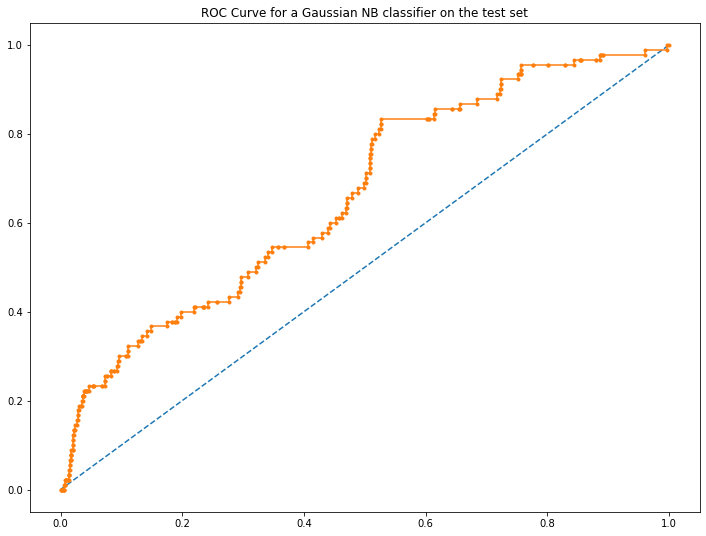

In [78]:
probs = final_model.predict_proba(X_reduced_pca_test)  # return shape   n X 2  prob: [class 0, class 1]
test_probs =probs[:,1]

pred = final_model.predict(X_reduced_pca_test)

x_axis = [0 for _ in range(len(y_test))]
ns_fpr,ns_tpr , _ =roc_curve(y_test,x_axis)
lr_fpr, lr_tpr, _ = roc_curve(y_test, test_probs)
fig,ax = plt.subplots(figsize=(12,9))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
ax.set_title("ROC Curve for a Gaussian NB classifier on the test set")
roc_auc_score_on_test = roc_auc_score(y_test, test_probs)
print(f"the roc auc score on the test set is {roc_auc_score_on_test}")
precision = precision_score(y_test,pred)
print(f"the precision score: {precision}")
recall = recall_score(y_test,pred)
print(f"the recall score: {recall}")

In [58]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_reduced_pca_train,y_train)

[22:19:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=624, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

the roc auc score on the test set is 0.5449526031165502
the precision score: 0.0017581558898222308
the recall score: 1.0


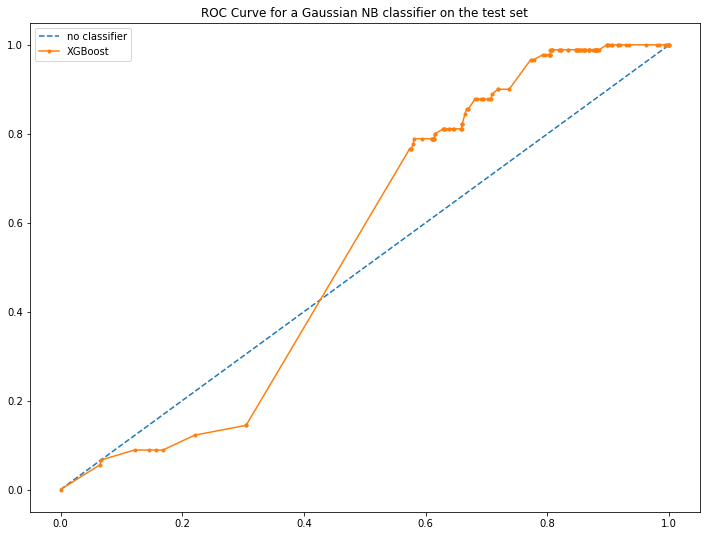

In [60]:
probs = xgb_model.predict_proba(X_reduced_pca_test)  # return shape   n X 2  prob: [class 0, class 1]
pred = xgb_model.predict(X_reduced_pca_test) 
test_probs = probs[:,1]
x_axis = [0 for _ in range(len(y_test))]
ns_fpr,ns_tpr , _ = roc_curve(y_test,x_axis)
lr_fpr, lr_tpr, _ = roc_curve(y_test, test_probs)
fig,ax = plt.subplots(figsize=(12,9))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='no classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')
ax.set_title("ROC Curve for a Gaussian NB classifier on the test set")
plt.legend()
roc_auc_score_on_test = roc_auc_score(y_test, test_probs)
print(f"the roc auc score on the test set is {roc_auc_score_on_test}")
precision = precision_score(y_test,pred)
print(f"the precision score: {precision}")
recall = recall_score(y_test,pred)
print(f"the recall score: {recall}")


In [55]:
precision = precision_score(y_test,pred)
print(f"the precision score: {precision}")
recall = recall_score(y_test,pred)
print(f"the recall score: {recall}")

the precision score: 0.0018110043952466223
the recall score: 0.9888888888888889


In [56]:
# ADD SMOTE / weight

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# generate dataset
X, y = X_reduced_pca_train,y_train
# define model
model = XGBClassifier()
# define grid
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

[22:14:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.975607 using {'scale_pos_weight': 1000}


In [57]:
print(f'Not fraudulent {100-round(y_test.mean()*100,2)}%')
print(f'Fraudulent {round(y_test.mean()*100,2)}%' )

Not fraudulent 99.84%
Fraudulent 0.16%


[22:32:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=600, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[22:35:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
the roc auc score on the test set is 0.6298258467357497
the precision score: 0.0015801394034095897
the recall score: 1.0


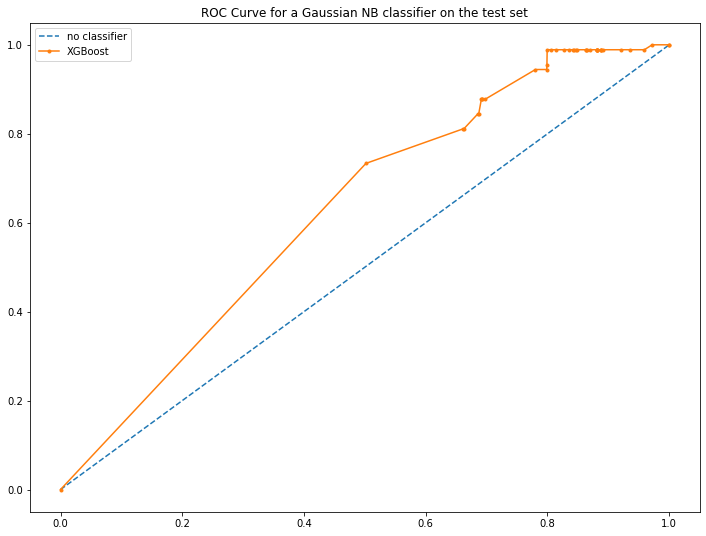

In [104]:
xgb_model = XGBClassifier(scale_pos_weight = 600, n_estimators=1000, max_depth= 4, learning_rate= 0.01)
xgb_model.fit(X_reduced_pca_train,y_train)

probs = xgb_model.predict_proba(X_reduced_pca_test)  # return shape   n X 2  prob: [class 0, class 1]
pred = xgb_model.predict(X_reduced_pca_test) 
test_probs = probs[:,1]
x_axis = [0 for _ in range(len(y_test))]
ns_fpr,ns_tpr , _ = roc_curve(y_test,x_axis)
lr_fpr, lr_tpr, _ = roc_curve(y_test, test_probs)
fig,ax = plt.subplots(figsize=(12,9))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='no classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')
ax.set_title("ROC Curve for a Gaussian NB classifier on the test set")
plt.legend()
roc_auc_score_on_test = roc_auc_score(y_test, test_probs)
print(f"the roc auc score on the test set is {roc_auc_score_on_test}")
precision = precision_score(y_test,pred)
print(f"the precision score: {precision}")
recall = recall_score(y_test,pred)
print(f"the recall score: {recall}")

the roc auc score on the test set is 0.6298258467357497
the precision score: 0.0015801394034095897
the recall score: 1.0


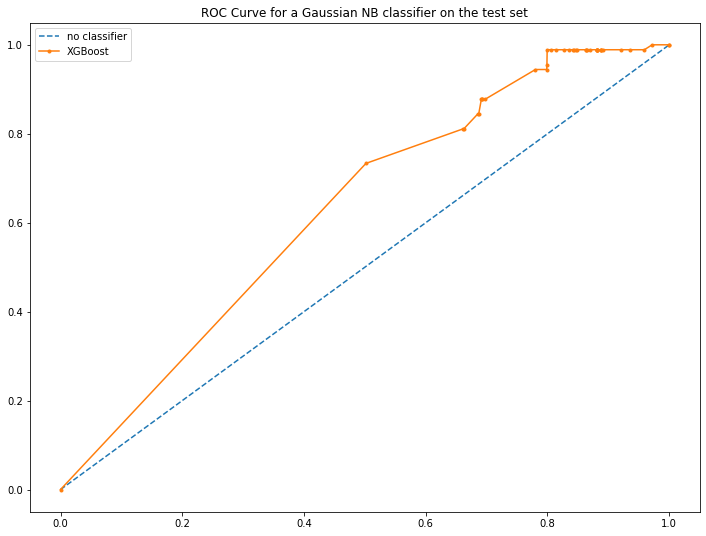

In [111]:
# ensemble
probs0 = xgb_model.predict_proba(X_reduced_pca_test)  # return shape   n X 2  prob: [class 0, class 1]
pred0 = xgb_model.predict(X_reduced_pca_test) 
test_probs0 = probs0[:,1]

probs1 = final_model.predict_proba(X_reduced_pca_test)  # return shape   n X 2  prob: [class 0, class 1]
pred1 = final_model.predict(X_reduced_pca_test)
test_probs1 =probs[:,1]


probs = (probs0+probs)*0.5
pred = [round(x/2) for x in (pred0+pred1)]
test_probs = (test_probs0+test_probs1)/2

x_axis = [0 for _ in range(len(y_test))]

ns_fpr,ns_tpr , _ = roc_curve(y_test,x_axis)
lr_fpr, lr_tpr, _ = roc_curve(y_test, test_probs)

fig,ax = plt.subplots(figsize=(12,9))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='no classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')
ax.set_title("ROC Curve for a Gaussian NB classifier on the test set")
plt.legend()

roc_auc_score_on_test = roc_auc_score(y_test, test_probs)
print(f"the roc auc score on the test set is {roc_auc_score_on_test}")
precision = precision_score(y_test,pred)
print(f"the precision score: {precision}")
recall = recall_score(y_test,pred)
print(f"the recall score: {recall}")

In [113]:
X_train

array([[-5.74136866,  3.81760243],
       [-7.63439203,  2.48685444],
       [-7.85634612,  1.06546512],
       ...,
       [-7.42186311,  1.66313579],
       [-7.31262237, -0.23415921],
       [-7.56362601,  0.0465509 ]])

Text(0, 0.5, 'cumulative explained variance')

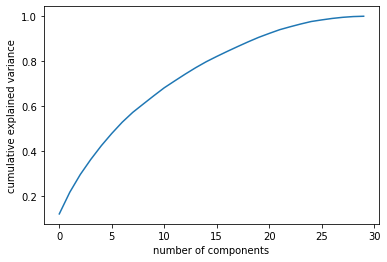

In [118]:
pca = PCA().fit(train_df.drop("Class",axis=1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [117]:
train_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
76518,-0.195416,-0.802917,1.002257,-0.287435,1.451104,1.072791,-1.114031,0.335595,-0.950493,0.423739,...,-0.146289,0.350647,0.947256,-0.041018,0.201715,0.187639,-0.253885,0.076319,0.034821,0
230620,-0.337884,1.087069,0.047614,0.774838,-0.717544,-0.808063,1.487288,-0.082698,0.710402,0.148222,...,0.061428,-0.328751,-0.886052,0.024547,-0.323372,-0.367956,0.150267,0.212858,0.067693,0
58440,-0.269869,-0.975849,1.462799,-0.724765,-1.513069,-1.693537,1.675587,3.166765,-0.838442,0.699044,...,0.191066,0.103177,0.183401,-0.208588,1.056952,0.946182,-0.050965,-0.008458,-0.001159,0
155427,-0.196048,0.223796,-1.008518,1.257715,2.492152,2.476023,0.872180,0.978696,0.533908,0.243703,...,-0.115997,0.061566,0.255153,-0.384959,0.488930,0.731256,0.049369,-0.025827,0.065161,0
187038,-0.342940,0.686107,-0.476683,1.412542,-1.431397,-0.269518,0.309671,-0.824817,0.094182,0.734315,...,-0.386347,0.420504,0.987905,-0.129200,-0.635174,-0.329202,-0.145333,-0.260716,-0.058683,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266138,-0.318135,1.419422,0.052953,0.806919,-0.103970,-0.939432,1.027910,-0.205429,0.937904,-0.034610,...,0.065060,-0.263596,-0.591030,-0.062697,-1.025490,-0.357000,0.181577,0.244295,0.079108,0
235960,-0.289618,1.133454,2.081041,-0.118926,-1.668911,0.196827,0.567378,-0.271551,0.184948,-0.167900,...,-0.200034,-0.262192,-0.613352,0.179355,-0.052498,0.083846,-0.490067,-0.018834,-0.052458,0
133538,-0.345902,-0.301546,-1.194676,1.353235,-0.203023,-1.567504,0.050194,-0.100596,-0.161311,1.015853,...,-0.125228,-0.092472,-0.393120,-0.087419,-1.300558,-0.020957,0.894611,0.051573,0.004362,0
128416,-0.341794,-0.337913,-1.294822,0.115075,0.761546,0.598855,0.608291,-0.968162,-0.368352,0.555981,...,0.230073,0.000607,-0.556430,0.044440,-0.039284,-0.728886,0.084063,0.024238,-0.067753,0
